In [2]:
import pandas as pd
pd.options.display.max_colwidth = 100
from IPython.display import display
import os
import warnings
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import math

plt.rcParams.update(plt.rcParamsDefault)
new_rc_params = {'text.usetex': False, "svg.fonttype": 'none'}
plt.rcParams.update(new_rc_params)

sns.set_style({'font.family':'sans-serif', 'font.sans-serif':'Arial'})
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['pdf.fonttype'] = 42

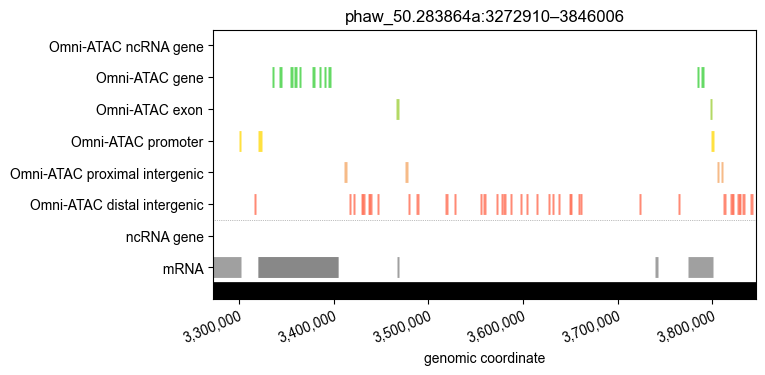

In [229]:
def chrom_dict_generator(lst):
    dict_dummy = {}
    for item in lst:
        chrom = item.split(':')[0]
        coords = item.split(':')[1]
        cleaned = coords.replace(',', '')
        start = int(cleaned.split('-')[0])
        end = int(cleaned.split('-')[1])
        dict_dummy[chrom] = (start, end)
    return dict_dummy

def plot_genome_region(chrom_sizes, regions_dict, chrom_dict, alias_dict,
                       draw_plots = False, padding = 0, figsize = (5, 3), alpha = 0.5,
                      savefig = False, prefix = '', imgtype = 'png'):
    
    #Load in chrom_sizes file
    chrom_sizes_df = pd.DataFrame(pd.read_csv(chrom_sizes, sep = '\t', header = None))
    chrom_sizes_df[2] = 1
    chrom_sizes_df = chrom_sizes_df[[0, 2, 1]]
    
    #load in chromosome and region specified in chrom_dict
    chrom_sizes_chroms = chrom_sizes_df[chrom_sizes_df[0].isin(chrom_dict.keys())]
    
    #load in data from each region_dict file
    region_data = {}
    
    for j in regions_dict:
        region_data[j] = pd.DataFrame(pd.read_csv(j, sep = '\t', header = None, skiprows = 2))
    
    if draw_plots:
    
        #make a plot for each chromosome and region
        for i in chrom_dict:
            start = chrom_dict[i][0]
            stop = chrom_dict[i][1]
            
            region_name = i + ':'+ str(start) + '–' + str(stop)
            
            plt.figure(figsize = figsize)
            
            #Set line representing baseline genome
            plt.hlines(-1, start, stop, color = 'k', linewidth = 25)
            
            hlines_sofar = 0
            hlines_legend = {}
            
            for j in region_data:
                data = region_data[j]
                overlapping = data[data[0] == i]
                overlapping = overlapping[(overlapping[3] >= start) | (overlapping[4] <= stop)]
                
                for datatype in regions_dict[j]:
                    correct_type = overlapping[overlapping[1] == datatype]
                    
                    if datatype == 'any':
                        correct_type = overlapping
                        
                    hlines_start = correct_type[3] - padding
                    hlines_end = correct_type[4] + padding
                    hlines_y = [hlines_sofar for h in hlines_start]
                    
                    plt.hlines(hlines_y, hlines_start, hlines_end, color = regions_dict[j][datatype], linewidth = 15, alpha = alpha)
                    
                    hlines_sofar += 1
                    
                    hlines_legend[' '.join([alias_dict[j], datatype])] = regions_dict[j][datatype]
                
                plt.hlines(hlines_sofar - 0.5, start, stop, linewidth = 0.5, linestyle = 'dotted', color = 'gray')
                    
            #clear yticks
            plt.yticks([i for i in np.arange(0, len(hlines_legend.keys()))], [i.replace('_', ' ') for i in hlines_legend.keys()])
        
            #set ylims based on number of datatypes being plotted
            plt.ylim(-1, hlines_sofar - 0.5)
        
            ax = plt.gca()
            ax.get_xaxis().set_major_formatter(
                mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
            plt.xticks(rotation = 22.5, ha = 'right', rotation_mode = 'anchor')
            plt.xlabel('genomic coordinate')
            plt.title(region_name)
        
            plt.xlim(start, stop)
            
            if savefig:
                plt.savefig(prefix + '_' + region_name.replace(':', '_') + '.' + imgtype)
            
            plt.show()
    
    return None

chrom_sizes = "~/Labwork/Bioinformatics/GenomeSequences/Phaw_5.0_Annotation/genome/phaw_5.0.chrom.sizes"

#chrom_dict = {
#    'phaw_50.282695a': (24050951, 27351978)
#}

chrom_dict = chrom_dict_generator(['phaw_50.283864a:3,272,910-3,846,006'])

#Specify the types of data you want plotted from each of your datasets, along with a color
regions_dict = {
    "~/Labwork/Bioinformatics/Transcripts/mikado.loci.sorted.reordered.forvis.gff": {
        'mRNA': 'gray',
        'ncRNA_gene': 'purple'
    },
    "~/Labwork/Bioinformatics/Transcripts/Sall_peaktypes_new.gff": {
        'distal_intergenic': 'tomato',
        'proximal_intergenic': 'sandybrown',
        'promoter': 'gold',
        'exon': 'yellowgreen',
        'gene': 'limegreen',
        'ncRNA_gene': 'cornflowerblue',
    }
}

#Assign an alias to each of your datasets (if desired) for cleaner plotting
#Or, leave blank
alias_dict = {
    "~/Labwork/Bioinformatics/Transcripts/mikado.loci.sorted.reordered.forvis.gff": '',
    "~/Labwork/Bioinformatics/Transcripts/Sall_peaktypes_new.gff": 'Omni-ATAC'
}

new = plot_genome_region(chrom_sizes, regions_dict, chrom_dict, alias_dict,
                        draw_plots = True, padding = 1000, figsize = (7, 3.5), alpha = 0.75,
                        savefig = True, prefix = 'En1_region_new', imgtype = 'svg')

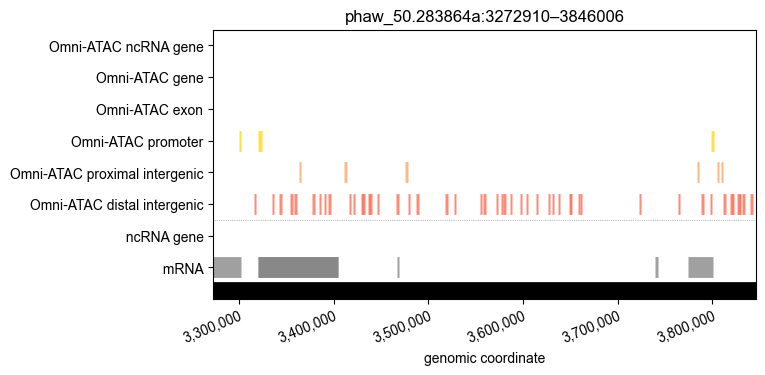

In [230]:
#Specify the types of data you want plotted from each of your datasets, along with a color
regions_dict2 = {
    "~/Labwork/Bioinformatics/Transcripts/mikado.loci.sorted.reordered.forvis.gff": {
        'mRNA': 'gray',
        'ncRNA_gene': 'purple'
    },
    "~/Labwork/Bioinformatics/Transcripts/Sall_peaktypes.gff": {
        'distal_intergenic': 'tomato',
        'proximal_intergenic': 'sandybrown',
        'promoter': 'gold',
        'exon': 'yellowgreen',
        'gene': 'limegreen',
        'ncRNA_gene': 'cornflowerblue',
    }
}

#Assign an alias to each of your datasets (if desired) for cleaner plotting
#Or, leave blank
alias_dict2 = {
    "~/Labwork/Bioinformatics/Transcripts/mikado.loci.sorted.reordered.forvis.gff": '',
    "~/Labwork/Bioinformatics/Transcripts/Sall_peaktypes.gff": 'Omni-ATAC'
}

new = plot_genome_region(chrom_sizes, regions_dict2, chrom_dict, alias_dict2,
                        draw_plots = True, padding = 1000, figsize = (7, 3.5), alpha = 0.75,
                        savefig = True, prefix = 'En1_region_old', imgtype = 'svg')